# Laboratorio 3 - Aprendizaje profundo CNN

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Preparación de datos

In [2]:
# Diccionario de labels
labels = [
    "Limite velocidad (20km/h)",
    "Limite velocidad (30km/h)",
    "Limite velocidad (50km/h)",
    "Limite velocidad (60km/h)",
    "Limite velocidad (70km/h)",
    "Limite velocidad (80km/h)",
    "Fin de limite velocidad (80km/h)",
    "Limite velocidad (100km/h)",
    "Limite velocidad (120km/h)",
    "No rebasar",
    "No rebasar para vehículos mayores de 3.5 toneladas métricas",
    "Derecho-de-vía en la siguiente intersección",
    "Camino prioritario",
    "Ceda el paso",
    "Alto",
    "No vehículos",
    "Prohibido vehículos mayores de 3.5 toneladas métricas",
    "No hay entrada",
    "Precaución general",
    "Curva peligrosa a la izquierda",
    "Curva peligrosa a la derecha",
    "Doble curva",
    "Camino disparejo",
    "Camino resbaloso",
    "Camino se reduce a la derecha",
    "Trabajos adelante",
    "Señales de Tráfico -semáforos-",
    "Cruce de peatones",
    "Cruce de Niños",
    "Cruce de bicicletas",
    "Cuidado hielo/nieve",
    "Cruce de animales silvestres",
    "Fin de todos los limites de velocidad y rebase",
    "Gire a la derecha adelante",
    "Gire a la izquierda adelante",
    "Recto solo",
    "Vaya recto o a la derecha",
    "Vaya recto o a la izquierda",
    "Manténgase a la derecha",
    "Manténgase a la izquierda",
    "Vuelta en U obligada",
    "Fin de no rebasar",
    "Fin de no rebasar para vehículos mayores de 3.5 toneladas métricas"
]

In [3]:
with open('datos\entrenamiento.p', 'rb') as file:
    train_data = pickle.load(file)
    
with open('datos\prueba.p', 'rb') as file:
    test_data = pickle.load(file)

with open('datos\\validacion.p', 'rb') as file:
    validation_data = pickle.load(file)


In [4]:
print(train_data.keys())
train_data['features'].shape

dict_keys(['coords', 'labels', 'features', 'sizes'])


(34799, 32, 32, 3)

**Imprimir imagen de ejemplo**

Label: 36  -  Vaya recto o a la derecha


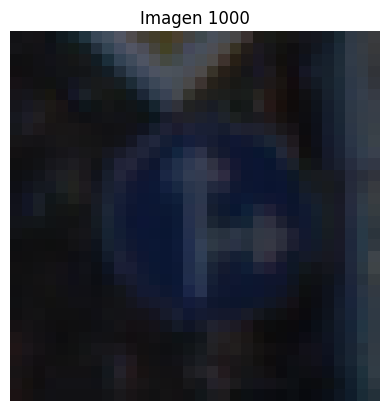

In [40]:
n = 1000  # Número de la imagen que se desea visualizar

print("Label:", train_data['labels'][n], " - ", labels[train_data['labels'][n]])

# Extraer la imagen específica
image_to_display = train_data['features'][n]

# Mostrar la imagen
plt.imshow(image_to_display)
plt.title(f'Imagen {n}')
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()


### Procesamiento de imagenes

#### Redimensionar a tamaño promedio

In [6]:
print(train_data['features'].shape)
print(test_data['features'].shape)
print(validation_data['features'].shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


Todas las imagenes tienen las mismas dimensiones por lo que no es necesario redimensionar

#### Normalizar imágenes

In [7]:
def normalize_images(images):
    # Convertir los valores a float y normalizar dividiendo por 255
    images = images.astype(np.float32) / 255.0
    return images

In [8]:
train_data['features'] = normalize_images(train_data['features'])
test_data['features'] = normalize_images(test_data['features'])
validation_data['features'] = normalize_images(validation_data['features'])

In [9]:
# Verificar que los datos estén normalizados (rango de 0 a 1)
print(train_data['features'].min(), train_data['features'].max())
print(test_data['features'].min(), test_data['features'].max())
print(validation_data['features'].min(), validation_data['features'].max())

0.0 1.0
0.0 1.0
0.0 1.0


### Construcción del modelo

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [24]:
from datetime import datetime
datetime.now().strftime("%Y-%m-%d--%H%M")

'2024-08-11--1830'

In [25]:
log_directory = 'logs\\fit'

# OPCIONAL: AGREGAR UNA MARCA DE TIEMPO PARA CARPETAS UNICAS
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '\\' + timestamp


tablero = TensorBoard(log_dir = log_directory, histogram_freq = 1,
    write_graph = True,
    write_images = True,
    update_freq = 'epoch',
    profile_batch = 2,
    embeddings_freq = 1)

In [26]:
modelo = Sequential()

forma_imagen = train_data['features'][0].shape

modelo.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=forma_imagen, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Flatten())

modelo.add(Dense(128, activation='relu'))

modelo.add(Dropout(0.5))

# Ajuste para multiclase con softmax
num_clases = len(labels)
modelo.add(Dense(num_clases))
modelo.add(Activation('softmax'))

modelo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,763 (370.17 KB)

 Trainable params: 94,763 (370.17 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de modelo

#### Codificar labels

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# Convertir las etiquetas a one-hot encoding
num_clases = len(labels)
train_labels = to_categorical(train_data['labels'], num_clases)
validation_labels = to_categorical(validation_data['labels'], num_clases)
test_labels = to_categorical(test_data['labels'], num_clases)

#### Early Stoping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

In [33]:
history = modelo.fit(
    train_data['features'],
    train_labels, 
    validation_data=(validation_data['features'], validation_labels),
    epochs=30,
    batch_size=32,
    callbacks = [early_stop, tablero]
)


Epoch 1/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9766 - loss: 0.0783 - val_accuracy: 0.9544 - val_loss: 0.2248
Epoch 2/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9792 - loss: 0.0638 - val_accuracy: 0.9601 - val_loss: 0.1634
Epoch 3/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9831 - loss: 0.0543 - val_accuracy: 0.9676 - val_loss: 0.1886
Epoch 4/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9866 - loss: 0.0452 - val_accuracy: 0.9608 - val_loss: 0.1981
Epoch 5/30
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9849 - loss: 0.0562 - val_accuracy: 0.9592 - val_loss: 0.1947


### Evaluar el modelo


In [34]:
test_loss, test_acc = modelo.evaluate(test_data['features'], test_labels)
print(f'Precisión en el conjunto de prueba: {test_acc}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9508 - loss: 0.2927
Precisión en el conjunto de prueba: 0.9482185244560242


In [41]:
import numpy as np
from sklearn.metrics import classification_report

# Realiza predicciones en el conjunto de datos de prueba
test_predictions = modelo.predict(test_data['features'])

# Convierte las predicciones a etiquetas (clases)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Convierte las etiquetas verdaderas a clases (si es necesario)
test_labels_classes = np.argmax(test_labels, axis=1)

# Calcula las métricas de evaluación
report = classification_report(test_labels_classes, test_predictions_classes, target_names=labels)
print(report)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
                                                                    precision    recall  f1-score   support

                                         Limite velocidad (20km/h)       0.97      0.93      0.95        60
                                         Limite velocidad (30km/h)       0.92      0.99      0.95       720
                                         Limite velocidad (50km/h)       0.92      0.97      0.94       750
                                         Limite velocidad (60km/h)       0.98      0.93      0.95       450
                                         Limite velocidad (70km/h)       0.93      0.98      0.96       660
                                         Limite velocidad (80km/h)       0.91      0.93      0.92       630
                                  Fin de limite velocidad (80km/h)       1.00      0.79      0.88       150
                                        Limite velocidad (100km/h)       0.96      0.92      0

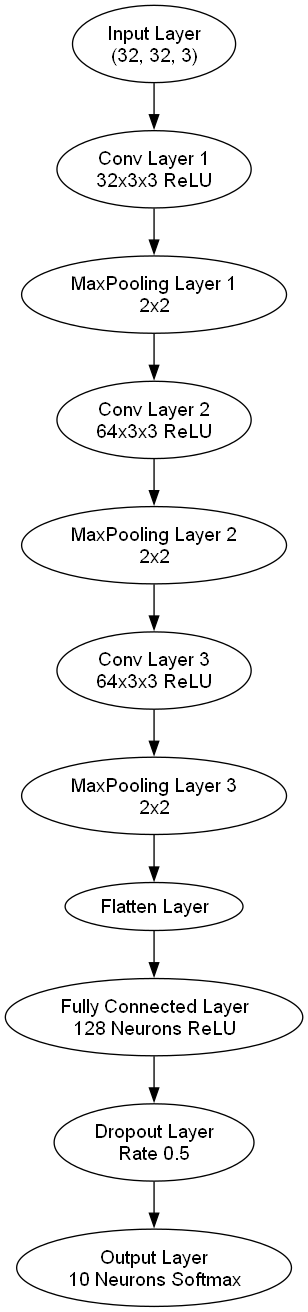

In [38]:
from graphviz import Digraph
from IPython.display import Image

def custom_model_architecture():
    dot = Digraph()
    dot.attr(fontname='Arial')
    
    dot.node('Input', 'Input Layer\n{}'.format(forma_imagen), fontname='Arial')
    
    dot.node('Conv1', 'Conv Layer 1\n32x3x3 ReLU', fontname='Arial')
    dot.node('Pool1', 'MaxPooling Layer 1\n2x2', fontname='Arial')
    
    dot.node('Conv2', 'Conv Layer 2\n64x3x3 ReLU', fontname='Arial')
    dot.node('Pool2', 'MaxPooling Layer 2\n2x2', fontname='Arial')
    
    dot.node('Conv3', 'Conv Layer 3\n64x3x3 ReLU', fontname='Arial')
    dot.node('Pool3', 'MaxPooling Layer 3\n2x2', fontname='Arial')
    
    dot.node('Flatten', 'Flatten Layer', fontname='Arial')
    
    dot.node('FC1', 'Fully Connected Layer\n128 Neurons ReLU', fontname='Arial')
    
    dot.node('Dropout', 'Dropout Layer\nRate 0.5', fontname='Arial')
    
    dot.node('Output', 'Output Layer\n{} Neurons Softmax'.format(num_clases), fontname='Arial')
    
    dot.edge('Input', 'Conv1')
    dot.edge('Conv1', 'Pool1')
    dot.edge('Pool1', 'Conv2')
    dot.edge('Conv2', 'Pool2')
    dot.edge('Pool2', 'Conv3')
    dot.edge('Conv3', 'Pool3')
    dot.edge('Pool3', 'Flatten')
    dot.edge('Flatten', 'FC1')
    dot.edge('FC1', 'Dropout')
    dot.edge('Dropout', 'Output')
    
    return dot

# Crear y renderizar el diagrama
forma_imagen = (32, 32, 3)  # Ejemplo de forma de imagen, ajusta según tus datos
num_clases = 10  # Ejemplo de número de clases, ajusta según tus datos

custom_model_diagram = custom_model_architecture()
custom_model_diagram.render('/mnt/data/custom_model_architecture', format='png')

# Mostrar la imagen dentro del notebook
Image('/mnt/data/custom_model_architecture.png')
